How do parents’ education level, travel and study time, number of class failures and school absences, quality of family relationships, and overall health affect final grade?


Introduction:

Portugal’s education is at the tail end of Europe’s educational level due to student failure and dropout rates (Cortez and Silvia, 2008). In 2006 Portugal's early school dropout rate was 40% for 18-24 year olds while the EU average was 15% (Cortez and Silvia, 2008). Particularly in Math core classes, which are built upon in later courses, failure rates were high (Cortez and Silvia, 2008). Using Business Intelligence (BI) and Data Mining (DM) methods to analyze trends could inform decision making around academic infrastructural support and corrective measures (Cortez and Silvia, 2008).
This data is provided by the University of Minho and records attributes such as gender, age, parents’ educational levels and occupations, the time students spend traveling to school, and personal time, among other factors that may affect students’ grades (Cortez and Silvia, 2008).



In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.plot.width = 12, repr.plot.height = 12) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Preliminary exploratory data analysis

In [2]:
# Read the zip file from url and unzip so it can be loaded into a dataframe
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
zip_file <- tempfile(fileext = ".zip")
download.file(url, zip_file, mode = "wb")
student_data <- read_delim(unz(description = zip_file, filename = "student-mat.csv"), delim = ";")

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



In [ ]:
# Write to csv so we can download it and more easily see the data we are working with
write.csv(student_data, "student_data.csv")

In [3]:
# Converted the binary predictors from (yes, no) to (1,0)
student_data_cleaned_binary <- student_data %>%
    mutate(school = recode(school, 
                     "GP" = "0",   # for school, GP value is 0, MS value is 1
                     "MS" = "1"))  %>% 
    mutate(school = as.numeric(school)) %>%
    mutate(sex = recode(sex,
                       "M" = "0",  # for sex, male is 0, female is 1
                       "F" = "1")) %>%
    mutate(sex = as.numeric(sex)) %>%
    mutate(address = recode(address,
                           "U" = "0",   # for address, urban is 0, rural is 1
                           "R" = "1")) %>%
    mutate(address = as.numeric(address)) %>%
    mutate(famsize = recode(famsize,
                           "LE3" = "0",  # for family size, less than or equal to 3 is 0, greater than 3 is 1
                           "GT3" = "1")) %>%
    mutate(famsize = as.numeric(famsize)) %>%
    mutate(Pstatus = recode(Pstatus,
                           "T" = "0",    # for parental cohabitation status, together is 0, apart is 1
                           "A" = "1")) %>%
    mutate(Pstatus = as.numeric(Pstatus)) %>%
    mutate(schoolsup = recode(schoolsup,
                             "no" = "0", # for extra education support at school, no is 0, yes is 1
                             "yes" = "1")) %>%
    mutate(schoolsup = as.numeric(schoolsup)) %>%
    mutate(famsup = recode(famsup,
                          "no" = "0",    # for extra educatino support at home, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(famsup = as.numeric(famsup)) %>%
    mutate(paid = recode(paid,
                          "no" = "0",    # for extra paid educatino support (tutor) , no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(paid = as.numeric(paid)) %>%
    mutate(activities = recode(activities,
                          "no" = "0",    # for extracurricular activities, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(activities= as.numeric(activities)) %>%
    mutate(nursery = recode(nursery,
                          "no" = "0",    # for if they attended nursery school (preschool/kindergarten, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(nursery = as.numeric(nursery)) %>%
    mutate(higher = recode(higher,
                          "no" = "0",    # for if they aspire for higher education, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(higher = as.numeric(higher)) %>%
    mutate(internet = recode(internet,
                          "no" = "0",    # for internet access at home, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(internet = as.numeric(internet)) %>%
    mutate(romantic = recode(romantic,
                          "no" = "0",    # for being in a romantic relationship, no is 0, yes is 1
                          "yes" = "1")) %>%
    mutate(romantic= as.numeric(romantic)) 



In [ ]:
# Write to csv again to see the data
write.csv(student_data_cleaned_binary, "student_data_cleaned.csv")

In [4]:
# Split the data into training and testing set
student_data_split <- initial_split(student_data_cleaned_binary, prop = 0.75, strate = Class)
student_train <- training(student_data_split)
student_test <- testing(student_data_split)

In [5]:
# Distribution of mother's education level
student_train_meduc <- group_by(student_train, Medu) %>%
    summarize(n = n())

# Distribution of father's education level
student_train_feduc <- group_by(student_train, Fedu) %>%
    summarize(n = n())

# Counts number of student failures
student_train_failure <- group_by(student_train, failures) %>%
    summarize(n=n())

# Counts number of student absences
student_train_absences <- group_by(student_train, absences) %>%
    summarize(n=n())

# Computes mean of student absences
student_train_absences_m <- group_by(student_train) %>%
    summarize(absences_m = mean(absences))

# Computes mean family relationship quality
student_train_famrel <- group_by(student_train) %>%
    summarize(famrel = mean(famrel))

# Computes mean overall health status
student_train_health <- group_by(student_train) %>%
    summarize(health = mean(health))

# Computes mean student travel time
student_train_travel <- group_by(student_train) %>%
    summarize(traveltime = mean(traveltime))

# Student final grade distribution
student_train_G3 <- group_by(student_train, G3) %>%
    summarize(n = n())

student_train_meduc
student_train_feduc
student_train_failure
student_train_absences
student_train_absences_m
student_train_famrel
student_train_health
student_train_travel
student_train_G3

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



Medu,n
<dbl>,<int>
0,2
1,45
2,81
3,74
4,95


Fedu,n
<dbl>,<int>
0,2
1,62
2,87
3,75
4,71


failures,n
<dbl>,<int>
0,234
1,38
2,15
3,10


absences,n
<dbl>,<int>
0,90
1,2
2,53
3,6
4,37
5,4
6,22
7,5
8,14


absences_m
<dbl>
5.707071


famrel
<dbl>
3.949495


health
<dbl>
3.582492


traveltime
<dbl>
1.461279


G3,n
<dbl>,<int>
0,30
4,1
5,4
6,12
7,7
8,24
9,25
10,42
11,34


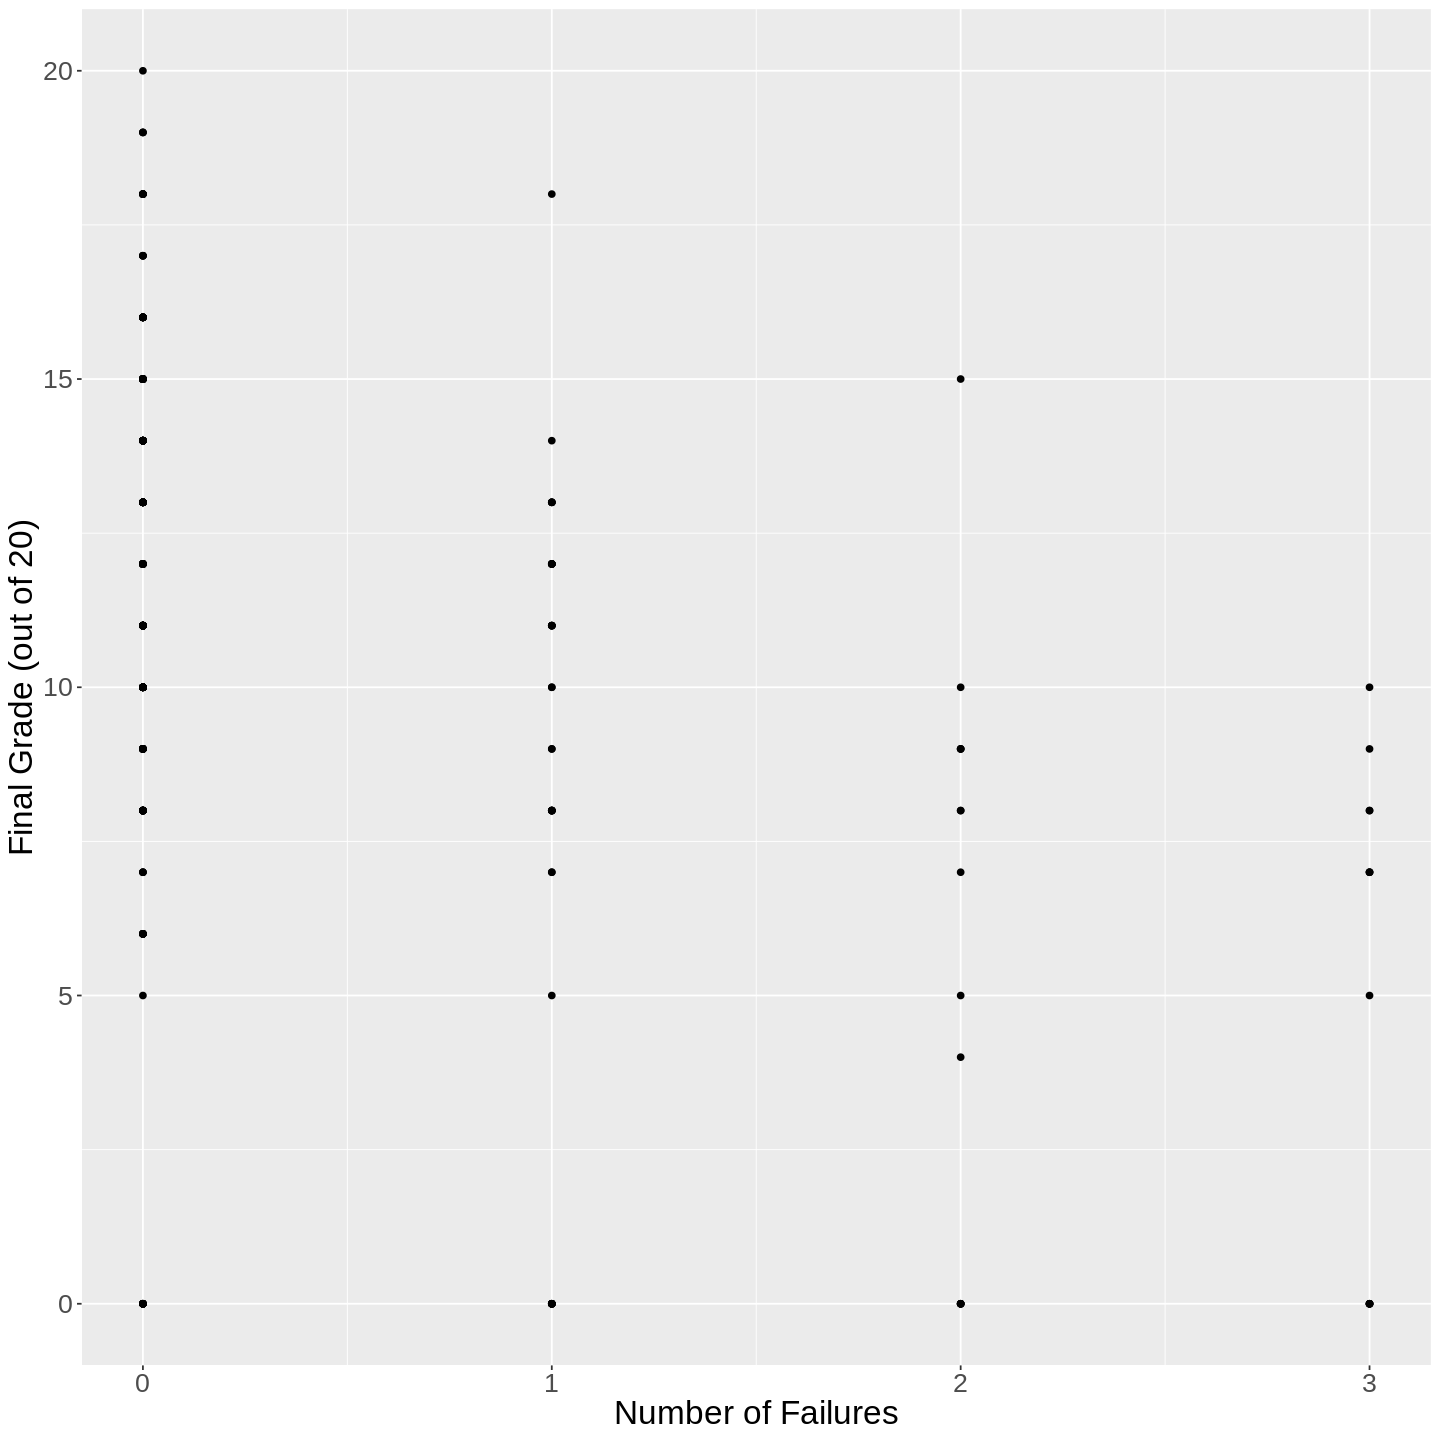

In [10]:
# Exploratory plot of Final Grade vs Number of Failures
student_plot <- ggplot(student_train, aes(x = failures, y = G3)) +
    geom_point() +
    labs(x = "Number of Failures" , y = "Final Grade (out of 20)") +
    theme(text = element_text(size = 20))
student_plot

In [6]:
# Grouped the Final Grade into intervals for easier labelling down the line
# Grades 0-5 is 1, 6-10 is 2, 11-15 is 3 and 16-20 is 4

student_train_group <- student_train %>%
    mutate(label = cut(G3, c(0, 9, 11, 13, 15, 20), 
                       labels = c("fail", "sufficient", "satisfactory", "good", "excellent"), 
                       left= FALSE)) %>%
    group_by(label = as.factor(label)) %>%
    filter(!is.na(label))

student_train_group

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1,18,0,1,1,4,4,at_home,teacher,⋯,3,4,1,1,3,6,5,6,6,fail
0,1,17,0,1,0,1,1,at_home,other,⋯,3,3,1,1,3,4,5,5,6,fail
0,1,15,0,0,0,1,1,at_home,other,⋯,3,2,2,3,3,10,7,8,10,sufficient
0,1,15,0,1,0,4,2,health,services,⋯,2,2,1,1,5,2,15,14,15,good
0,1,16,0,1,0,3,3,other,other,⋯,3,2,1,2,5,4,6,10,10,sufficient
0,0,16,0,0,0,2,2,other,other,⋯,4,4,1,1,3,0,12,12,11,sufficient
0,1,17,0,1,1,4,4,other,teacher,⋯,1,4,1,1,1,6,6,5,6,fail
0,0,15,0,0,1,3,2,services,other,⋯,2,2,1,1,1,0,16,18,19,excellent
0,0,15,0,1,0,3,4,other,other,⋯,5,1,1,1,5,0,14,15,15,good


In [110]:
# Write to csv for reasons
write_csv(student_train_group , "student_train_group.csv")

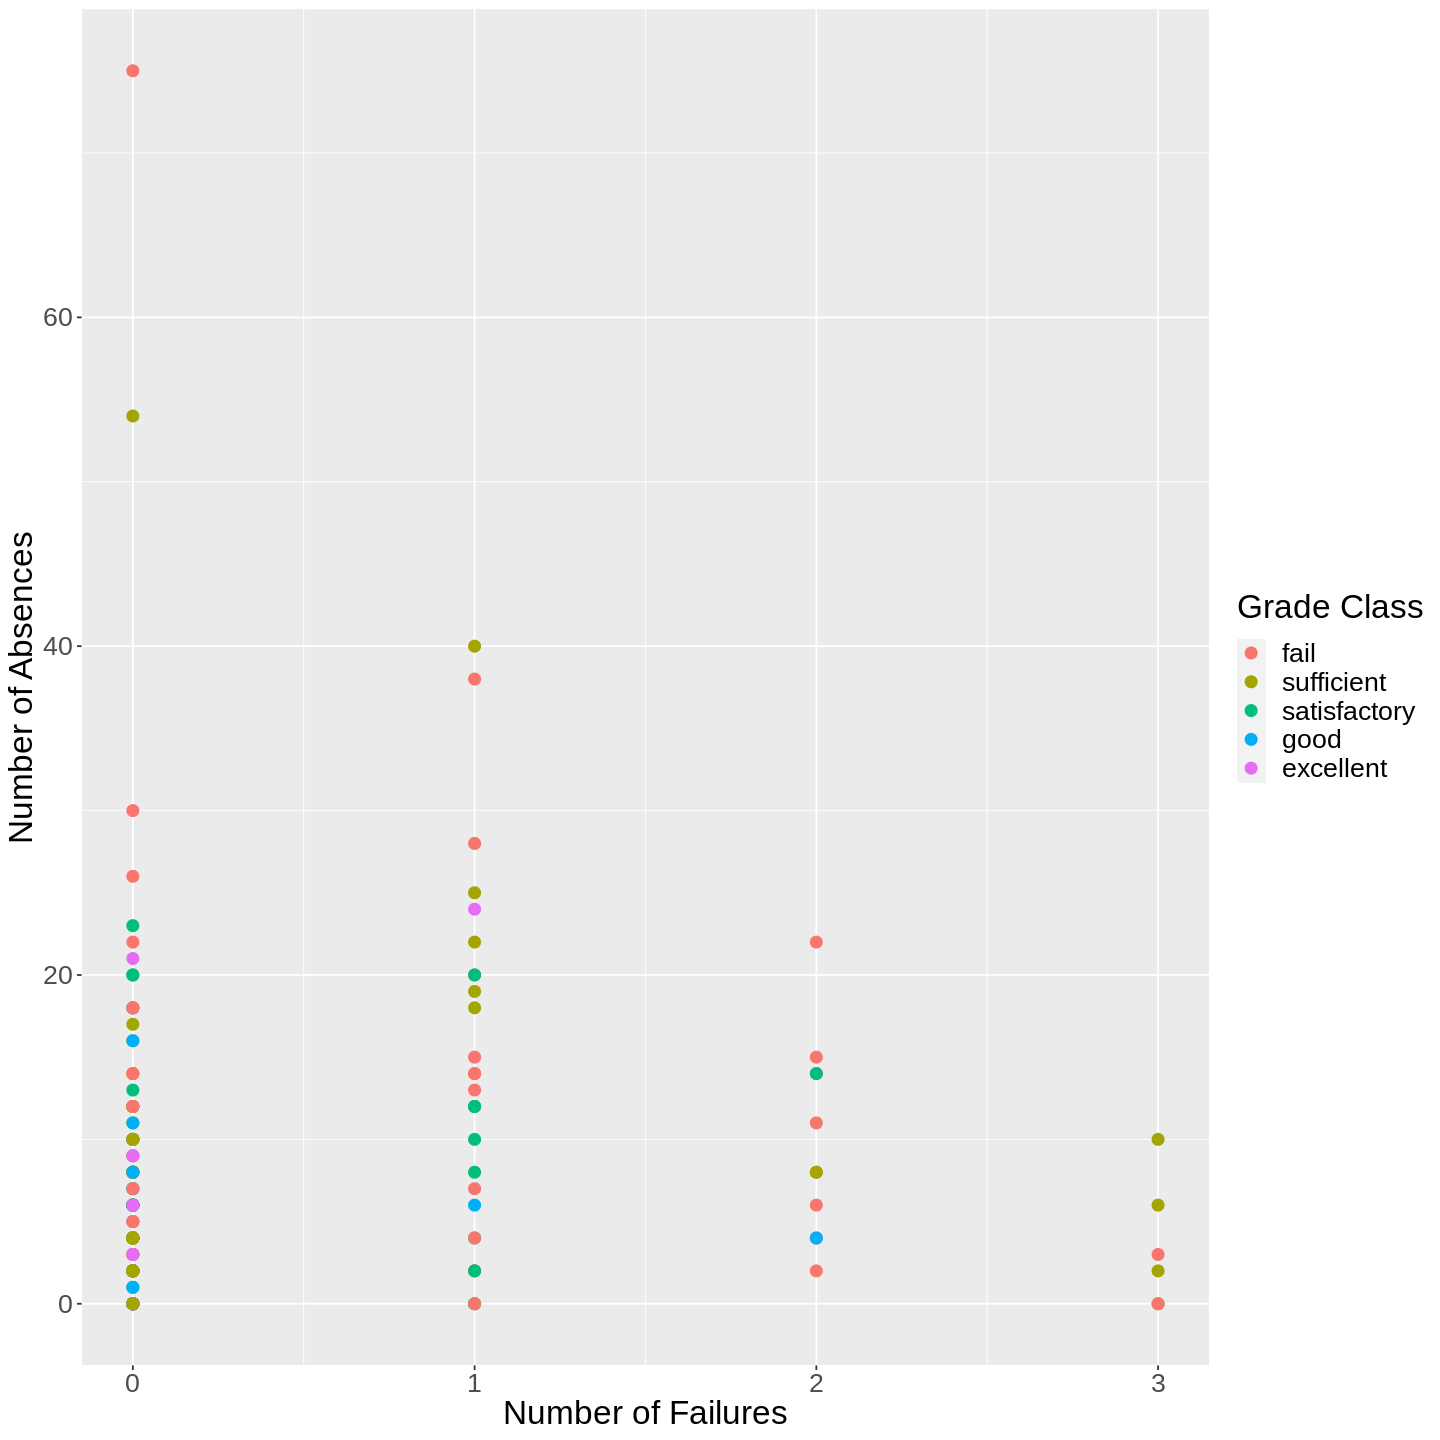

In [7]:
# Exporatory plot of Number of Absences vs Number of Failure with Grades as class labels
student_plot2 <- ggplot(student_train_group, aes(x = failures, y = absences, fill = label)) +
    geom_point(aes(color = label), size = 3) +
    labs(x = "Number of Failures" , y = "Number of Absences", fill = "Grade Class", color = "Grade Class") +
    theme(text = element_text(size = 20))
student_plot2

Methods:

Our data analysis will use mother and father’s education level, student’s travel and study time, number of class failures, family relationship quality, student’s overall health, and number of school absences to determine the student’s final Math grade.
The final grades in the data set are distributed from 0 to 20. For easier classification, we will group them according to Portuguese universities’ 5-level grade classification. Grades 0-9 are a ‘fail’, 10-11 are ‘sufficient’, 12-13 are ‘satisfactory’, 14-15 are ‘good’, and 16-20 are ‘excellent’.
To perform the classification, we will use the k-NN algorithm. We will split our data set into 75% training and 25% testing data as our data set is small (n = 268) and center and scale the training data for equally weighted attributes during classification.
We will cross-validate our model to determine the average prediction accuracy. Tune the model and pick a K that results in a higher accuracy to use in our model specification. We will fit our training data and model specification and make a prediction on a new observation. The testing data can then be used to analyze our model’s performance.
To visualize our results, we will create a scatterplot (eg. # of school absences and student’s health) and label each point with the student’s grade ‘class’. The axes will be labeled accordingly and scaled and centered to avoid any confusion. Multiple scatterplots can be made with closely related predictors such as # of class failures and # of school absences, etc.


Expected outcomes and significance:

Our research question asks how certain academic and social predictors affect the final math grade of a university student. We expect to find a correlation between a student’s past performance, academic support, accessibility and their final grade. Students with records of more effort, support, and higher grades are expected to continue those trends.
If our findings support this hypothesis, they could be used to identify students at risk of failure and inform decisions surrounding educational support and corrective measures such as extra classes.
Although our analysis focuses on academic history, support, and accessibility, the outcomes could lead to further questions about trends in academic insecurity, and what proactive, as opposed to reactive, measures can be taken.


Bibliography

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.


Alice's Comments:

Mechanics: 8
- Work is reproducible and self-contained. Dataset is successfully read from the web.
- No need to write.csv every time you make a change to your dataset. If you assign it to an object, you should still be able to use that same object throughout your project without having to save your changed onto your computer.
- When you are printing out your tables, please use the head( ) function so it’s much easier for the readers to view!

Reasoning: 52
- The predictors you have chosen are fairly unconventional for a classification analysis. To achieve the best performance, I usually recommend that the predictors be numerical and continuous, rather than categorical and discrete. However, because we don’t cover how to work around categorical predictors in the scope of this course, you are still free to continue on with your analysis if you wish! Just make sure that with every unconventional result (perhaps a low accuracy result or a strange looking graph), make sure to state this point clearly and give good written explanation.
- No reasoning given for any of the tables or the plots! Remember whenever we create a visualization we always want to give explanation to why we decided to make that graph/table and what information we can pull out of it.
- While your introduction contains a lot of information about the context of the data, I suggest replacing some of the background info with what you found out about the dataset. For example, what kinds of predictors were there originally, and what were their units? What are the potential relationships between them that you thought could guide your proposal?
- You’ve started off selecting the 6 predictors of interest right off the bat. This is interesting, as you are not using any analysis of the data to come to this conclusion. Also, this is quite a large number of predictor variables to use. Did you look into ways you could narrow down your predictors? Why/why not? Make sure that if you do want to start with your predictors pre-chosen, give good reasoning behind your choice potentially using external sources that better define their connection.
- Need more reasoning in the 75/25 data split with regards to the size of the dataset/number of observations in each class.

Writing: 19
- Good use of comments throughout the work—easy to follow along.
- Consider breaking up some of your methods and inserting it between your code cells to give better explanation of each step taken.
- Writing is clear and word count is respected.